# 1. Setting the working environment

In [ ]:
pip install pyLDAvis

In [2]:
import pyLDAvis #package to interpret the topics in a topic model
import pyLDAvis.gensim_models #python library for the interactive topic modeling visualization
import pickle #for html export
import pandas as pd #for data processing
import os #for setting working directory
import re #regular expression library
from wordcloud import WordCloud #for generating word clouds
import gensim #open-souce library for unsupervised topic modeling, document indexing
from gensim.utils import simple_preprocess
import nltk #python toolkit for NLP
nltk.download('stopwords')
from nltk.corpus import stopwords #for removing stopwords
import gensim.corpora as corpora #for mapping words to integers
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 2. Import

In [4]:
#Master Folder Path
master_path = 'BA_reviews_1.csv'
reviews = pd.read_csv(master_path)
print("The shape of the data is ----->", reviews.shape)
reviews.head(10)

The shape of the data is -----> (3895, 2)


,Unnamed: 0,reviews
0,0,✅ Trip Verified | We have sat on this plane fo...
1,1,Not Verified | British Airways stranding my w...
2,2,✅ Trip Verified | Although like many these d...
3,3,✅ Trip Verified | This flight was British Airw...
4,4,Not Verified | The worst airline I have ever f...
5,5,"✅ Trip Verified | Disappointing service, pla..."
6,6,✅ Trip Verified | A transit visa is required...
7,7,✅ Trip Verified | I was surprised to receive...
8,8,"✅ Trip Verified | Flight cancelled, not refu..."
9,9,"✅ Trip Verified | I had visa issues, and hen..."


# 3. Initial Pre-Processing of the Data

In [5]:
#Remove Punctuation and lower casing
reviews['reviews_processed'] = \
reviews['reviews'].map(lambda x:re.sub('[,\.|?]', '', x))

#Convert the titles into lowercase
reviews['reviews_processed'] = \
reviews['reviews_processed'].map(lambda x:x.lower())

#Print out the first rows of papers
reviews['reviews_processed'].head()

,reviews_processed
0,✅ trip verified we have sat on this plane for...
1,not verified british airways stranding my wi...
2,✅ trip verified although like many these da...
3,✅ trip verified this flight was british airwa...
4,not verified the worst airline i have ever fl...


# 4. Exploratory Data Analysis on the Data

To verify whether the preprocessing, we will make a simple word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model

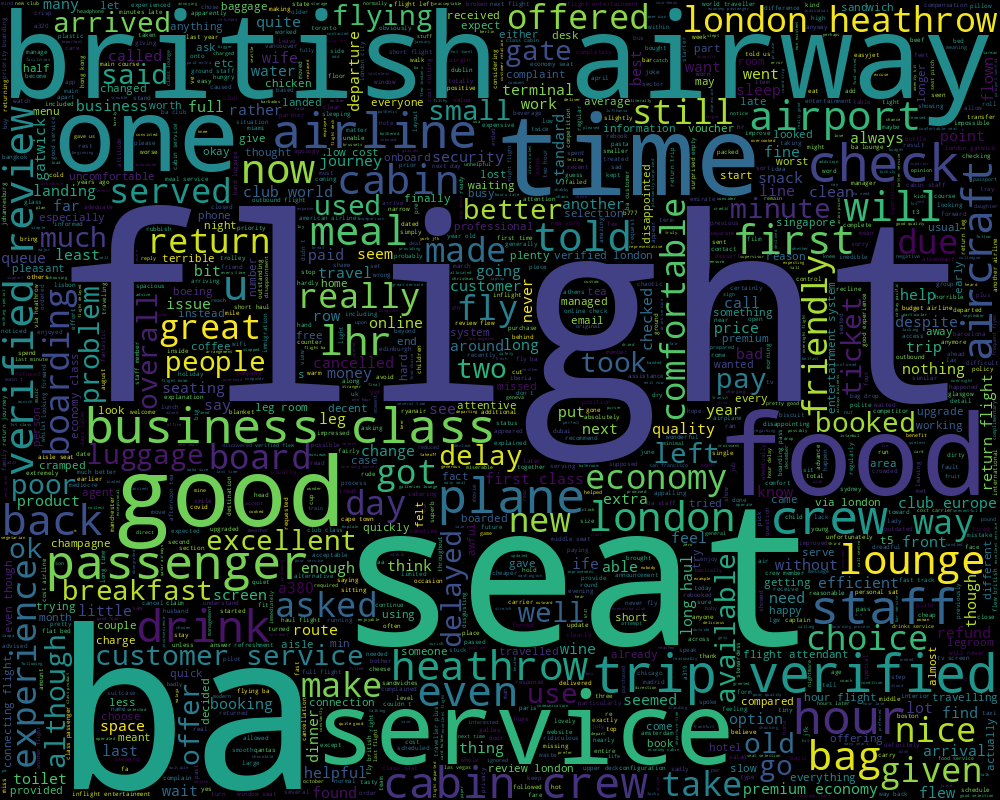

In [6]:
#Join the different processed titles together
long_string = ','.join(list(reviews['reviews_processed'].values))

#Create a WordCloud project
Wordcloud = WordCloud(background_color = "black", max_words = 5000, contour_width = 3, contour_color = "steelblue", width = 1000, height = 800)

#Generate a word cloud
Wordcloud.generate(long_string)

#Visualize the wordcloud
Wordcloud.to_image()

# 5. Initiating the LDA analysis

Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [9]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'used','using','use','model','one','two','set'])
"""
    Functions for converting sentence to words
"""
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
"""
    Functions removing the stopwords
"""
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data = reviews.reviews_processed.values.tolist()#creating the array of token
data_words = list(sent_to_words(data))#converting them into list

data_words = remove_stopwords(data_words)# remove stop words
print(data_words[:1][0][:30])

['trip', 'verified', 'sat', 'plane', 'hour', 'forty', 'five', 'minutes', 'awaiting', 'takeoff', 'due', 'bad', 'weather', 'london', 'understandable', 'safety', 'fortunately', 'long', 'layover', 'delay', 'affect', 'however', 'many', 'others', 'lucky', 'waiting', 'given', 'small', 'bottle', 'water']


In [10]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Printing the corpus in a numeric form which implies the frequency of the word
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [11]:
#Showing the code
id2word

# 6. LDA Model Training

Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [12]:
from pprint import pprint
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"flight" + 0.012*"british" + 0.010*"airways" + 0.010*"cabin" + '
  '0.010*"service" + 0.009*"ba" + 0.008*"london" + 0.008*"heathrow" + '
  '0.008*"food" + 0.008*"time"'),
 (1,
  '0.016*"flight" + 0.016*"ba" + 0.012*"class" + 0.008*"seat" + 0.008*"london" '
  '+ 0.008*"first" + 0.007*"crew" + 0.007*"food" + 0.007*"airways" + '
  '0.007*"british"'),
 (2,
  '0.014*"flight" + 0.013*"ba" + 0.013*"airways" + 0.012*"british" + '
  '0.012*"service" + 0.009*"class" + 0.009*"crew" + 0.009*"business" + '
  '0.007*"time" + 0.007*"cabin"'),
 (3,
  '0.022*"flight" + 0.014*"ba" + 0.012*"food" + 0.007*"british" + '
  '0.007*"service" + 0.007*"class" + 0.007*"verified" + 0.007*"seats" + '
  '0.006*"business" + 0.006*"good"'),
 (4,
  '0.017*"ba" + 0.013*"flight" + 0.009*"first" + 0.009*"cabin" + 0.008*"food" '
  '+ 0.008*"crew" + 0.007*"service" + 0.007*"seat" + 0.007*"british" + '
  '0.006*"staff"'),
 (5,
  '0.014*"flight" + 0.013*"ba" + 0.010*"seat" + 0.009*"cabin" + 0.008*"time" + '
  '

# 7. Analysing the LDA Model

Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

1. Better understanding and interpreting individual topics, and
2. Better understanding the relationships between the topics.
For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.

For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.o transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [14]:
# Visualize the topics
pyLDAvis.enable_notebook()

# Extract the directory containing papers.csv
masterr_path = os.path.dirname(master_path)

# Define the results directory and create it if needed
results_dir = os.path.join(masterr_path, '02_Results')
os.makedirs(results_dir, exist_ok=True)

# Filepath for LDAvis data
LDAvis_data_filepath = os.path.join(results_dir, f'ldavis_prepared_{num_topics}')


# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared,'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.000542  0.005100       1        1  23.118644
8      0.001135  0.013146       2        1  21.305899
9      0.010517  0.011163       3        1  11.728607
1      0.000782 -0.000409       4        1  11.472723
5     -0.003809  0.003789       5        1   7.439816
0      0.015672  0.005529       6        1   7.136983
6     -0.018068  0.001911       7        1   6.701275
2      0.013700 -0.025167       8        1   5.004838
3     -0.003295 -0.005043       9        1   3.337990
4     -0.016092 -0.010019      10        1   2.753225, topic_info=         Term         Freq        Total Category  logprob  loglift
67         ba  5186.000000  5186.000000  Default  30.0000  30.0000
113    flight  7017.000000  7017.000000  Default  29.0000  29.0000
19       food  2413.000000  2413.000000  Default  28.0000  28.0000
7     british  2309.000000  2309.000000  Default  27.0000  27.0000
132   service  2878.000000  2878.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
292     seats    44.634078  2307.727111  Topic10  -5.2947  -0.3531
149      good    40.869848  2333.414047  Topic10  -5.3828  -0.4523
845  business    36.069265  1562.580371  Topic10  -5.5077  -0.1763
79   heathrow    32.954015  1576.223993  Topic10  -5.5981  -0.2753
44      plane    29.792511  1131.235567  Topic10  -5.6989  -0.0444

[804 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
4769       1  0.116146      absent
4769       2  0.580730      absent
4769       4  0.116146      absent
4769       7  0.116146      absent
7119       1  0.076276       abuja
...      ...       ...         ...
139       10  0.024617       would
12949      3  0.715009        xlee
9104       5  0.427070  yesterdays
8090       4  0.221470      zagreb
8090       7  0.442940      zagreb

[1941 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 10, 2, 6, 1, 7, 3, 4, 5])